In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

%matplotlib inline 
sns.set(style="ticks")

In [48]:
data = pd.read_csv('./sample_data/master.csv', sep=",")

# размер набора данных
data.shape

(27820, 12)

In [49]:
# типы колонок
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [50]:
# проверим есть ли пропущенные значения
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [51]:
generation = 'generation'
population = 'population'
hdi = 'HDI for year'
age = 'age'

# Первые 5 строк датасета
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


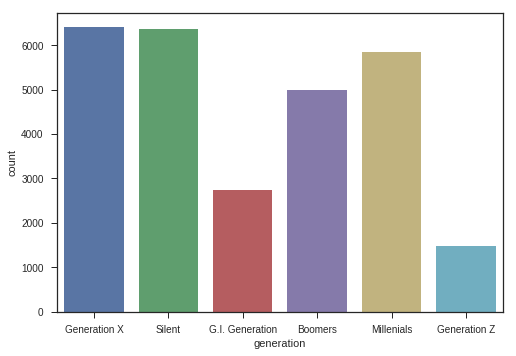

In [52]:
sns.countplot(x=generation, data=data);

In [53]:
# Удаление строк, содержащих пустые значения
filled_data = data.dropna(axis=0, how='any')
(data.shape, filled_data.shape)

((27820, 12), (8364, 12))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


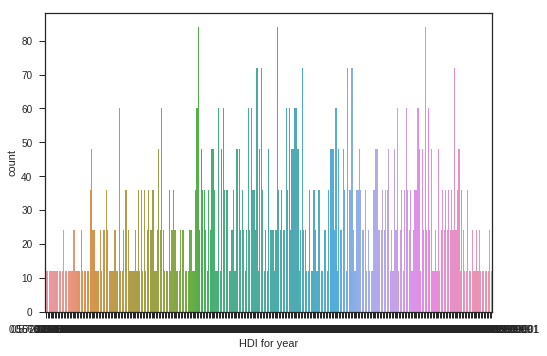

In [54]:
sns.countplot(x=hdi, data=filled_data);

In [55]:
#категоризацмя label encoding
le = LabelEncoder()
car_enc_le = le.fit_transform(filled_data[age])
filled_data[age].unique()

array(['25-34 years', '55-74 years', '75+ years', '15-24 years',
       '35-54 years', '5-14 years'], dtype=object)

In [56]:
encoded_age = np.unique(data_enc_le)
encoded_age

array([0, 1, 2, 3, 4, 5])

In [57]:
le.inverse_transform(encoded_age)

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [58]:
#категоризация bin encoding
pd.get_dummies(filled_data).head()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),country_Albania,country_Antigua and Barbuda,country_Argentina,country_Armenia,...,"gdp_for_year ($) _98,478,349,315","gdp_for_year ($) _99,697,566,668","gdp_for_year ($) _99,853,528,653","gdp_for_year ($) _99,886,577,331",generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
72,1995,13,232900,5.58,0.619,835,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
73,1995,9,178000,5.06,0.619,835,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
74,1995,2,40800,4.90,0.619,835,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
75,1995,13,283500,4.59,0.619,835,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
76,1995,11,241200,4.56,0.619,835,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


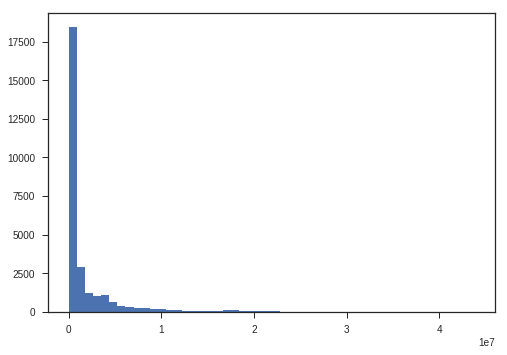

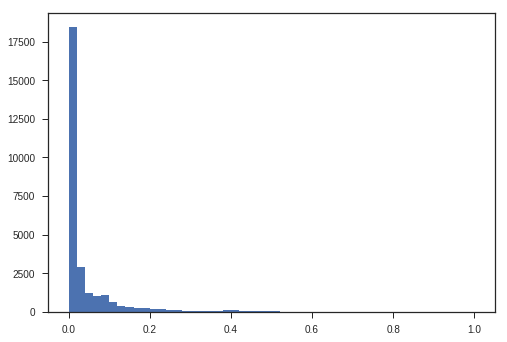

In [63]:
#масштабирование MinMax
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(data[[population]])

plt.hist(data[population], 50)
plt.show()

plt.hist(scaler_data, 50)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


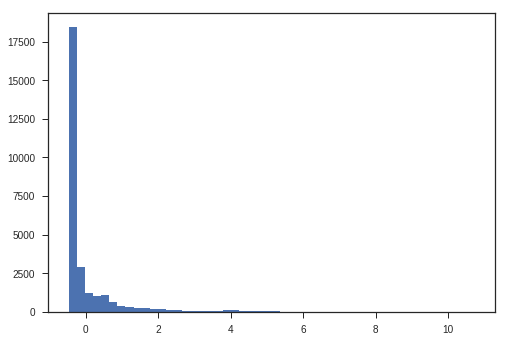

In [65]:
#масштабирование данных на основе Z-оценки 
scaler = StandardScaler()
scaler_data = scaler.fit_transform(data[[population]])

plt.hist(scaler_data, 50)
plt.show()

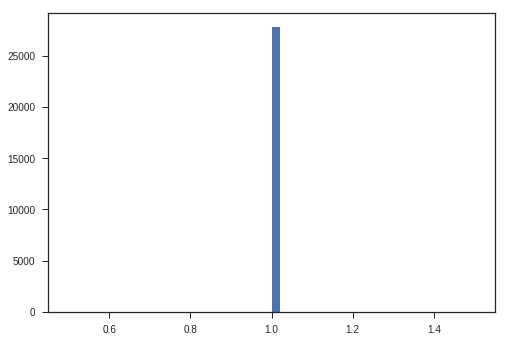

In [68]:
#масштабирование нормализация
scaler = Normalizer()
scaler_data = scaler.fit_transform(data[[population]])

plt.hist(scaler_data, 50)
plt.show()